In [9]:
#K-Means Clustering for Customer Segmentation
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv('Wholesale customers data.csv')

# Standardizing the data 
features = data.drop(columns=['Channel', 'Region'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


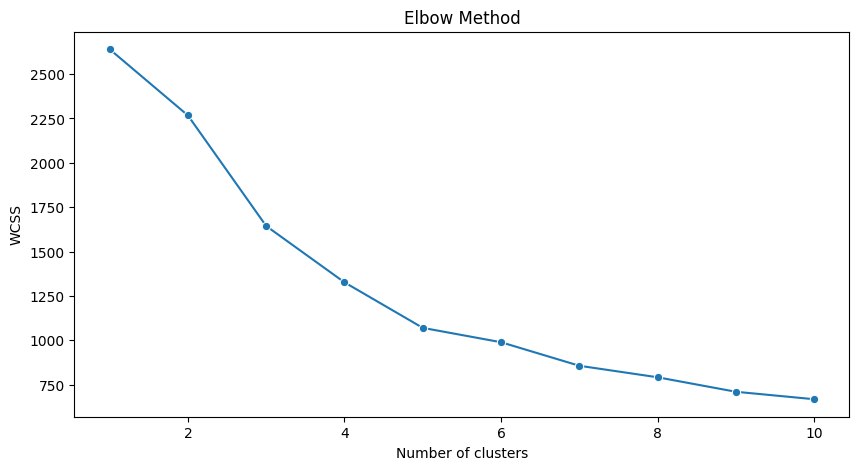

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Determining the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Fitting the K-Means model with the optimal number of clusters 
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters


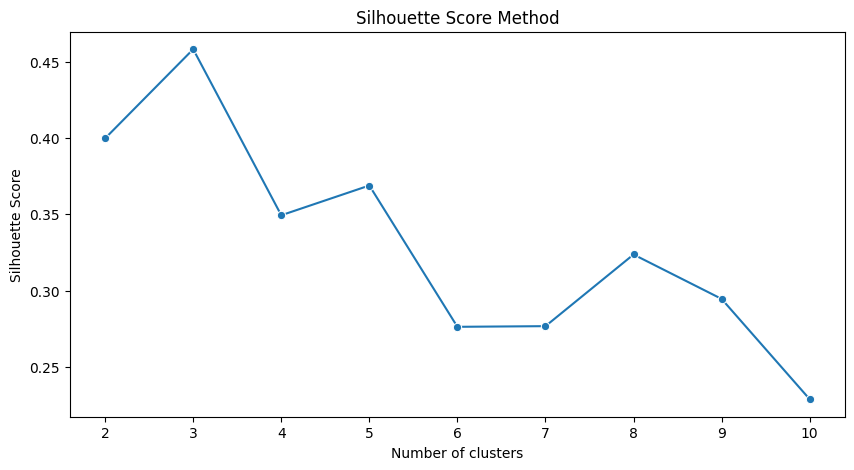

In [12]:
#Evaluating the Optimal Number of Cluster
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # Silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, clusters)
    silhouette_scores.append(score)

# Plot the Silhouette scores
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


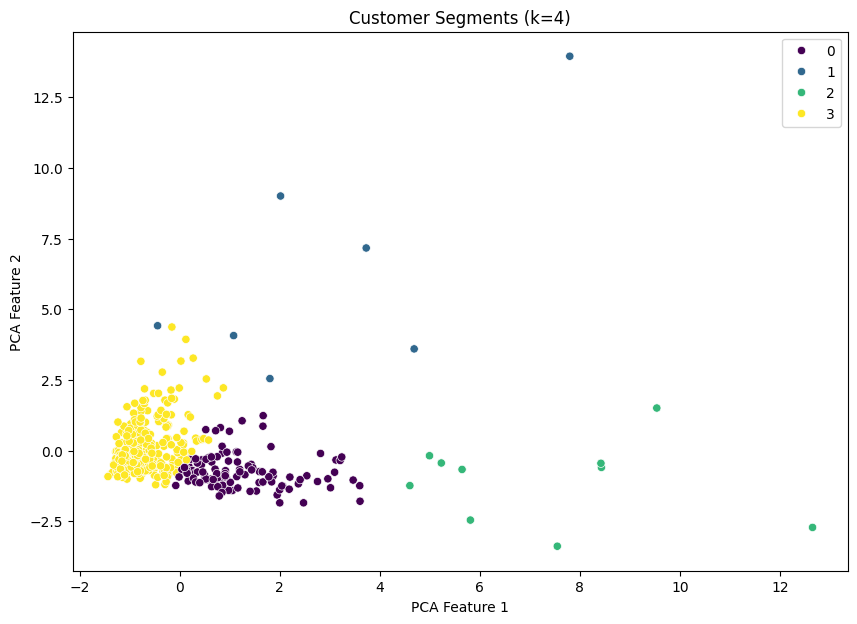

In [14]:
from sklearn.decomposition import PCA
# Fit K-Means with the chosen number of clusters
optimal_k = 4  # Replace with your chosen value based on the Elbow and Silhouette methods
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title(f'Customer Segments (k={optimal_k})')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


In [15]:
#Cluster Analysis and Interpretation
# cluster centroids
centroids = kmeans.cluster_centers_

centroid_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=features.columns)
centroid_df['Cluster'] = range(1, optimal_k + 1)
centroid_df


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,5474.926606,10194.192661,15587.807339,1464.385321,6734.642202,1642.458716,1
1,40136.857143,19452.142857,15026.285714,23713.714286,2374.142857,15735.142857,2
2,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000,3
3,13511.964968,3044.394904,3850.121019,3170.350318,854.808917,1122.105096,4


In [16]:
# Adding the cluster labels to the original dataset
data['Cluster'] = clusters

# Calculating the mean of each feature for each cluster
cluster_analysis = data.groupby('Cluster').mean()
cluster_analysis


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.853211,2.550459,5474.926606,10194.192661,15587.807339,1464.385321,6734.642202,1642.458716
1,1.142857,2.857143,40136.857143,19452.142857,15026.285714,23713.714286,2374.142857,15735.142857
2,2.000000,2.500000,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
3,1.121019,2.535032,13511.964968,3044.394904,3850.121019,3170.350318,854.808917,1122.105096


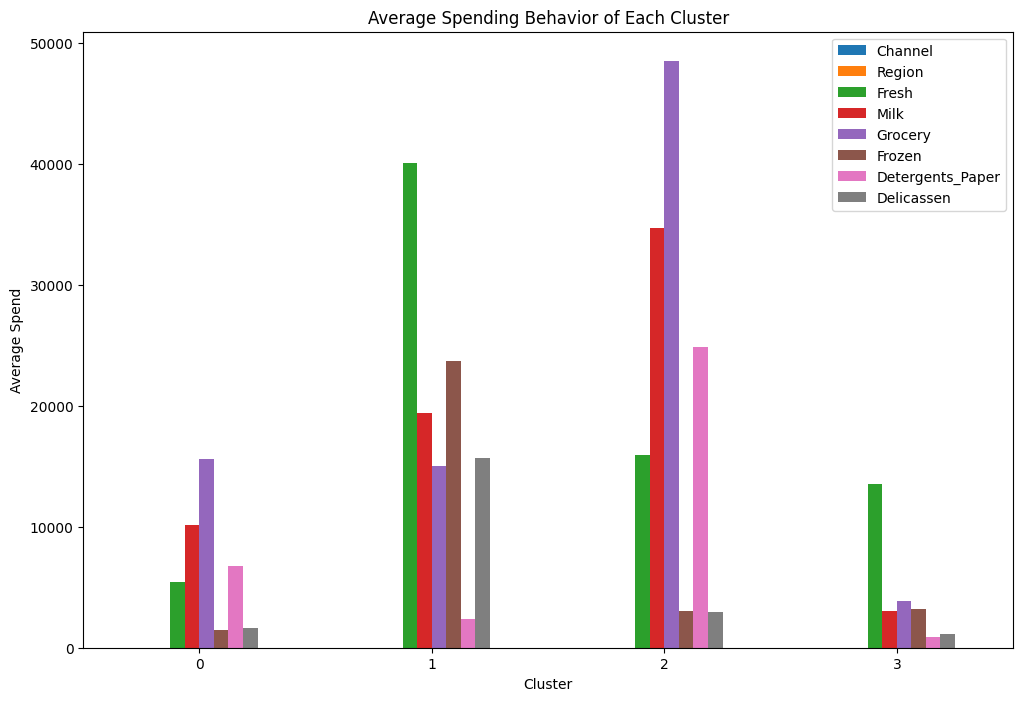

In [17]:
cluster_analysis.plot(kind='bar', figsize=(12, 8))
plt.title('Average Spending Behavior of Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spend')
plt.xticks(rotation=0)
plt.show()


In [18]:
 #Hierarchical Clustering: Dendrogram and Cluster Formation
from sklearn.preprocessing import StandardScaler

# Standardizing the data 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


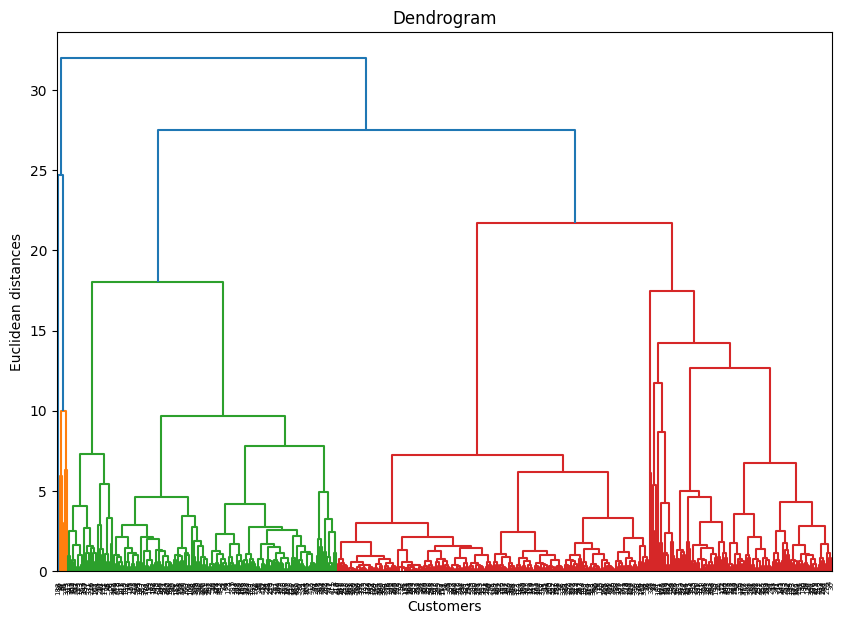

In [19]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Creating the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [21]:
from sklearn.cluster import AgglomerativeClustering

# Choosing the number of clusters based on the dendrogram
n_clusters = 4 

# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(scaled_features)

# Adding hierarchical cluster labels to the original dataset
data['HC_Cluster'] = hc_clusters


In [22]:

comparison = pd.crosstab(data['Cluster'], data['HC_Cluster'], rownames=['K-Means'], colnames=['Hierarchical'])
print(comparison)


Hierarchical    0  1    2  3
K-Means                     
0               4  0  105  0
1               6  0    0  1
2               0  5    5  0
3             271  0   43  0


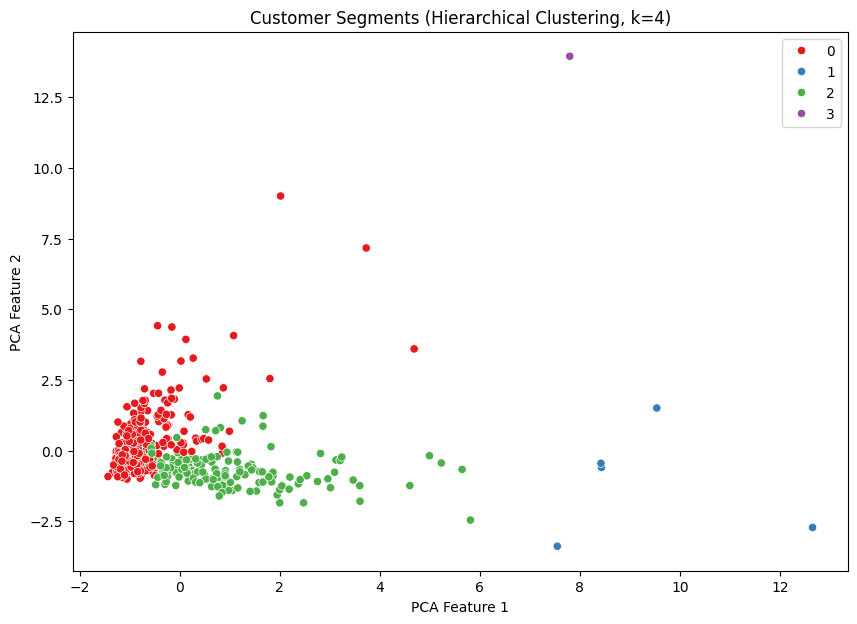

In [23]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reducing dimensionality for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# hierarchical clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=hc_clusters, palette='Set1')
plt.title(f'Customer Segments (Hierarchical Clustering, k={n_clusters})')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


In [24]:
# Comparison of Clustering Results
import numpy as np

# cluster centroids for K-Means
kmeans_centroids = kmeans.cluster_centers_

# cluster centroids for Hierarchical Clustering
hc_centroids = data.groupby('HC_Cluster').mean().values

# Pairwise distances for both clustering methods
from scipy.spatial.distance import pdist, squareform

kmeans_distances = squareform(pdist(kmeans_centroids))
hc_distances = squareform(pdist(hc_centroids))

print("K-Means Centroid Distances:\n", kmeans_distances)
print("Hierarchical Clustering Centroid Distances:\n", hc_distances)


K-Means Centroid Distances:
 [[0.         7.48523264 6.21496932 2.13462082]
 [7.48523264 0.         9.02792645 7.46611725]
 [6.21496932 9.02792645 0.         8.15511542]
 [2.13462082 7.46611725 8.15511542 0.        ]]
Hierarchical Clustering Centroid Distances:
 [[    0.         77013.42696455 16072.82414469 75252.08910384]
 [77013.42696455     0.         66400.5012967  76889.06390326]
 [16072.82414469 66400.5012967      0.         74897.78391318]
 [75252.08910384 76889.06390326 74897.78391318     0.        ]]
